In [1]:
%matplotlib inline

#text analysis
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
# Read file in the same folder.
df = pd.read_csv(r'emails.csv')
df2 = pd.read_csv(r'emails2.csv', encoding = 'latin-1')

In [3]:
# Shape.
df.shape

(5728, 2)

In [4]:
df2.shape

(5572, 5)

In [5]:
# Detect missing values.
print(df.isna().sum())
print('---------------')
print(df2.isna().sum())

text    0
spam    0
dtype: int64
---------------
v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64


In [6]:
# drop unwanted of df2
df2 = df2.drop(labels = ["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis = 1)

In [7]:
# Detect missing values.
print(df.columns)
print('---------------')
print(df2.columns)

Index(['text', 'spam'], dtype='object')
---------------
Index(['v1', 'v2'], dtype='object')


In [8]:
# Rename df2 columns name to match with df
df2.columns = ["spam", "text"]

In [9]:
# Detect missing values.
print(df.columns)
print('---------------')
print(df2.columns)

Index(['text', 'spam'], dtype='object')
---------------
Index(['spam', 'text'], dtype='object')


In [10]:
print(df.head())
print('---------------')
print(df2.head())

                                                text  spam
0  Subject: naturally irresistible your corporate...     1
1  Subject: the stock trading gunslinger  fanny i...     1
2  Subject: unbelievable new homes made easy  im ...     1
3  Subject: 4 color printing special  request add...     1
4  Subject: do not have money , get software cds ...     1
---------------
   spam                                               text
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [11]:
# Switch columns of df2 to match with df
df2 = df2[['text', 'spam']]

In [12]:
print(df.head())
print('---------------')
print(df2.head())

                                                text  spam
0  Subject: naturally irresistible your corporate...     1
1  Subject: the stock trading gunslinger  fanny i...     1
2  Subject: unbelievable new homes made easy  im ...     1
3  Subject: 4 color printing special  request add...     1
4  Subject: do not have money , get software cds ...     1
---------------
                                                text  spam
0  Go until jurong point, crazy.. Available only ...   ham
1                      Ok lar... Joking wif u oni...   ham
2  Free entry in 2 a wkly comp to win FA Cup fina...  spam
3  U dun say so early hor... U c already then say...   ham
4  Nah I don't think he goes to usf, he lives aro...   ham


In [13]:
print(df.dtypes)
print('---------------')
print(df2.dtypes)

text    object
spam     int64
dtype: object
---------------
text    object
spam    object
dtype: object


In [14]:
# Replay ham = 0, spam = 1 to match with df
df2["spam"].replace({'ham': 0, 'spam': 1}, inplace=True)

In [15]:
print(df.dtypes)
print('---------------')
print(df2.dtypes)

text    object
spam     int64
dtype: object
---------------
text    object
spam     int64
dtype: object


In [16]:
print(df.head())
print('---------------')
print(df2.head())

                                                text  spam
0  Subject: naturally irresistible your corporate...     1
1  Subject: the stock trading gunslinger  fanny i...     1
2  Subject: unbelievable new homes made easy  im ...     1
3  Subject: 4 color printing special  request add...     1
4  Subject: do not have money , get software cds ...     1
---------------
                                                text  spam
0  Go until jurong point, crazy.. Available only ...     0
1                      Ok lar... Joking wif u oni...     0
2  Free entry in 2 a wkly comp to win FA Cup fina...     1
3  U dun say so early hor... U c already then say...     0
4  Nah I don't think he goes to usf, he lives aro...     0


In [17]:
# Merge df2 to df and assign to df. 
df = df.merge(df2, how='outer')

In [18]:
df.shape

(11300, 2)

In [19]:
# Detect duplicate values.
df[df.duplicated()].shape

(436, 2)

In [20]:
# Drop duplicate values.
df.drop_duplicates(inplace = True)

df[df.duplicated()].shape

(0, 2)

In [21]:
# Apply a function along an axis of the DataFrame.
df['length']=df['text'].apply(len)
df.head()

,text,spam,length
0,Subject: naturally irresistible your corporate...,1,1484
1,Subject: the stock trading gunslinger fanny i...,1,598
2,Subject: unbelievable new homes made easy im ...,1,448
3,Subject: 4 color printing special request add...,1,500
4,"Subject: do not have money , get software cds ...",1,235


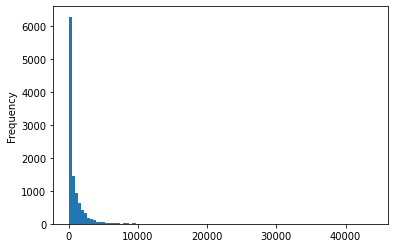

In [22]:
# The kind of plot to produce: histogram
df['length'].plot(bins=100,kind='hist')

In [23]:
df.length.describe()

count    10864.000000
mean       854.328884
std       1656.452801
min          2.000000
25%         63.750000
50%        217.000000
75%       1036.250000
max      43952.000000
Name: length, dtype: float64

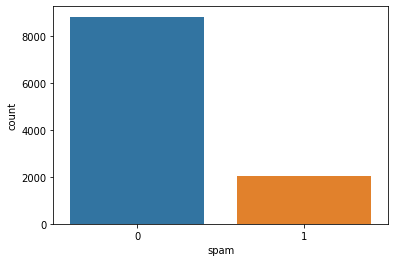

In [24]:
sns.countplot(df['spam'])

In [25]:
df.shape

(10864, 3)

In [26]:
# Email length > 3000 then drop
df[df['length']>3000]['spam'].value_counts()

0    559
1    114
Name: spam, dtype: int64

In [27]:
for index in df[df['length']>3500].index.tolist():
    df.drop(index=index, axis=1, inplace=True)

In [28]:
df.shape

(10381, 3)